# 1. Import Libraries:

In [1]:
!pip install wordcloud lazypredict

In [2]:
import pandas as pd
from sklearn.utils import resample
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import pickle
import time

import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset (Centralized)

## Dataset 1:

In [3]:
df1 = pd.read_csv('Twitter-Hate-Speech(kaggle)/Twitter Hate Speech/train_E6oV3lV.csv') # data-path
print("Training Set 1 :"% df1.columns, df1.shape)

df1.head()

Training Set 1 : (31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# splitting the dataset into Train and Test:
train1, test1 = train_test_split(df1, test_size=0.3,random_state=10, shuffle=True)

train1 = train1[['label','tweet']]
test1 = test1[['label','tweet']]

print("Training Set 3 :"% train1.columns, train1.shape)
print("Test Set 3 :"% test1.columns, test1.shape)
print('Train Set 3 -----')
print(train1.isnull().sum())
print('Test Set 3 -----')
print(test1.isnull().sum())
train1.head()

Training Set 3 : (22373, 2)
Test Set 3 : (9589, 2)
Train Set 3 -----
label    0
tweet    0
dtype: int64
Test Set 3 -----
label    0
tweet    0
dtype: int64


,label,tweet
3796,0,yes it is! choose to be happy. #hellolulu ...
31281,0,@user so excited to have a #tweetseat for #sc...
31282,0,friends come and go but the true friends stick...
10392,0,you've gotta love millennials - micah tyler - ...
13130,0,#three #faces by #kaye #menner #photography ...


## Dataset 2:


In [5]:
df = pd.read_csv('Twitter-Hate-Speech(kaggle)/Cyberbullying/toxicity_parsed_dataset.csv') # dataset path
df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.90,0.10,0
1,1,` :Clarification for you (and Zundark's righ...,1.00,0.00,0
2,2,Elected or Electoral? JHK,1.00,0.00,0
3,3,`This is such a fun entry. Devotchka I once...,1.00,0.00,0
4,4,Please relate the ozone hole to increases in c...,0.80,0.20,0


In [6]:
#useful cols:
df = df[['oh_label','Text']]
df.head()

,oh_label,Text
0,0,This: :One can make an analogy in mathematical...
1,0,` :Clarification for you (and Zundark's righ...
2,0,Elected or Electoral? JHK
3,0,`This is such a fun entry. Devotchka I once...
4,0,Please relate the ozone hole to increases in c...


In [7]:
# renaming the selected cols:
# Before renaming the columns
print("\nBefore modifying column names:\n", df.columns)

df.rename(columns = {'oh_label':'label','Text':'tweet'}, inplace = True)

# After renaming the columns
print("\nAfter modifying first column:\n", df.columns)


Before modifying column names:
 Index(['oh_label', 'Text'], dtype='object')

After modifying first column:
 Index(['label', 'tweet'], dtype='object')


In [8]:
# splitting the dataset into Train and Test:
train2, test2 = train_test_split(df, test_size=0.3,random_state=10, shuffle=True)

train2 = train2[['label','tweet']]
test2 = test2[['label','tweet']]

print("Training Set 2 :"% train2.columns, train2.shape)
print("Test Set 2 :"% test2.columns, test2.shape)
print('Train Set 2 -----')
print(train2.isnull().sum())
print('Test Set 2 -----')
print(test2.isnull().sum())
train2.head()

Training Set 2 : (111780, 2)
Test Set 2 : (47906, 2)
Train Set 2 -----
label    0
tweet    0
dtype: int64
Test Set 2 -----
label    0
tweet    0
dtype: int64


,label,tweet
69140,0,", 30 July 2008 (UTC) *: *double-checks your us..."
157499,0,born 31march 1995 Yes
83922,0,dated prod|concern = confirmed sockpuppet] of ...
30953,0,Where is that documented? It's certainly not...
150734,0,`:Perfectly fine - we'll appreciate your contr...


## Dataset 3 - Davidson

Twitter Hate Speech

In [9]:
df3 = pd.read_csv('AHSD-davidson-2019/labeled_data.csv') # dataset path
df3.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
#useful cols:
df3 = df3[['class','tweet']]
df3.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
# renaming the selected cols:
# Before renaming the columns
print("\nBefore modifying column names:\n", df3.columns)

df3.rename(columns = {'class':'label','tweet':'tweet'}, inplace = True)

# After renaming the columns
print("\nAfter modifying first column:\n", df3.columns)


Before modifying column names:
 Index(['class', 'tweet'], dtype='object')

After modifying first column:
 Index(['label', 'tweet'], dtype='object')


In [12]:
# Filter out offensive language rows
df3 = df3[df3['label'] != 1]

# Map the labels
df3['label'] = df3['label'].map({0: 1, 2: 0})

In [13]:
df3.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
40,0,""" momma said no pussy cats inside my doghouse """
63,0,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,0,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,0,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."


In [14]:
# splitting the dataset into Train and Test:
train3, test3 = train_test_split(df3, test_size=0.3,random_state=10, shuffle=True)

train3 = train3[['label','tweet']]
test3 = test3[['label','tweet']]

print("Training Set 3 :"% train3.columns, train3.shape)
print("Test Set 3 :"% test3.columns, test3.shape)
print('Train Set 3 -----')
print(train3.isnull().sum())
print('Test Set 3 -----')
print(test3.isnull().sum())
train3.head()

Training Set 3 : (3915, 2)
Test Set 3 : (1678, 2)
Train Set 3 -----
label    0
tweet    0
dtype: int64
Test Set 3 -----
label    0
tweet    0
dtype: int64


,label,tweet
8363,0,Can't tell if Mexico has been impressive or if...
4306,1,@NyJusDntGAF just like a nig to come home when...
5542,0,@ashley_smith20 colored contacts
21439,0,That was not good times! Starting the mickey m...
15026,0,RT @DonnieWahlberg: On set of #BlueBloods. Hop...


## Merging Train and Test Datasets from Dataset1, Dataset2, and Dataset 3:


In [15]:
# Merging 3 Train Data Sets
# train = pd.concat([train1], ignore_index = True)
# train = pd.concat([train2], ignore_index = True)
# train = pd.concat([train3], ignore_index = True)
train = pd.concat([train1, train2, train3], ignore_index = True)
train.shape

(138068, 2)

In [16]:
train['label'].value_counts()

label
0    124789
1     13279
Name: count, dtype: int64

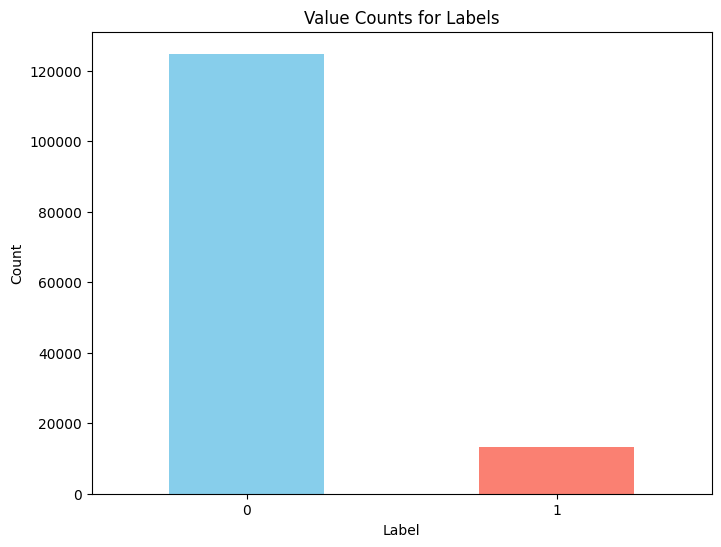

In [17]:
# Assuming you have a DataFrame named 'train' with a column 'label'
label_counts = train['label'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Value Counts for Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [20]:
# Merging three Test Data Sets
test = pd.concat([test1,test2,test3], ignore_index = True)
print(test.shape)
test.head()

(59173, 2)


,label,tweet
0,0,baby moose plays with a backyard sprinkler ...
1,0,today's learning : loving him means doing what...
2,0,ð ð¸ ð ð #love #instagood #photooft...
3,0,celebrating with â  of my besties #national...
4,0,facebook is just a political warzone these days.


# 3. Data Analysis and Cleaning
We cleaned each text by converting it to lowercase and removing unnecessary characters (e.g. @, Non-Alphanumeric, URLs). 

In [21]:
# Clean Data:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

We have a huge class imbalance by checking the count of each label in each dataset. 
We address issues of extreme class imbalance by augmenting the hateful words and generating new texts on train sets based on them to balance the size of hateful and non-hateful texts.

In [22]:
# upsampled
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
# train_minority_upsampled = resample(train_minority,
#                                  replace=True,
#                                  n_samples=len(train_majority),
#                                  random_state=123)
# train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled = pd.concat([train_minority, train_majority])
train_upsampled['label'].value_counts()

label
1    124789
0    124789
Name: count, dtype: int64

In [23]:
print("train without upsampling")
print(train_clean.shape)
# train_clean

print("train with upsampling")
print(train_upsampled.shape)
# train_upsampled

(138068, 2)


# 4. Visualizing the Data


In [ ]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_clean['tweet'][train.label == 0])
text_neg = " ".join(train_clean['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

In [ ]:
# Counting the labels
train_clean_counts = train_clean['label'].value_counts()
train_upsampled_counts = train_upsampled['label'].value_counts()

# Creating a DataFrame to hold the counts
counts_df = pd.DataFrame({
    'train': train_clean_counts,
    'train_upsampled': train_upsampled_counts
}).transpose()

# Plotting
plt.figure(figsize=(10, 6))
counts_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Label Counts in Train and Train Upsampled Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.show()


In [ ]:
print('--------------After Upsampling the Minority Class---------------')
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_upsampled['tweet'][train.label == 0])
text_neg = " ".join(train_upsampled['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

# 5. Tokenizer and Data transofrmed

### Test Data

In [25]:
test_transformed = test_clean[['label','tweet']]
y_test = test_transformed.iloc[:, :-1].values
test_clean['label'].value_counts()

label
0    53418
1     5755
Name: count, dtype: int64

In [26]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y_test = np.array(ct.fit_transform(y_test))

y_test_df = pd.DataFrame(y_test)
y_test_hate = np.array(y_test_df[0])

cv = CountVectorizer(max_features = 2000)
x_test = cv.fit_transform(test_clean['tweet']).toarray()
x_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Train and Validation

In [29]:
dt_trasformed = train_upsampled[['label', 'tweet']]
y = dt_trasformed.iloc[:, :-1].values

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [34]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])

cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(train_upsampled['tweet']).toarray()
x

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## Train & Test splitting the Data

In [39]:
x_train, x_val, y_train, y_val = train_test_split(x, y_hate, test_size = 0.3, random_state = 1)

# 6. Testing with Different Models


## Decision Tree:

The Decision Tree classifier uses a tree-like model of decisions based on the entropy criterion to split nodes, optimizing the classification process by maximizing information gain. We used the DecisionTreeClassifier from the scikit-learn library for our decision tree implementation. To ensure reproducibility, the model was configured with the criterion set to entropy and a random state of $0$. This setup allows the model to make splits based on the information gain, optimizing the decision-making process at each node.


In [40]:
# Using Decision Tree
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Start timer
start_time = time.time()

classifier_dt.fit(x_train, y_train)

# End timer
end_time = time.time()

In [29]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Decision Tree: {training_time:.6f} seconds")

Training time of Decision Tree: 495.842286 seconds


### Matrix Confusion

In [41]:
from sklearn.metrics import confusion_matrix

#Decision Tree [validation]
print("Validation")
y_pred_dt = classifier_dt.predict(x_val)
cm = confusion_matrix(y_val, y_pred_dt)
print(cm)

#Decision Tree [test]
print("Test:")
y_test_pred_dt = classifier_dt.predict(x_test)
cm2 = confusion_matrix(y_test_hate, y_test_pred_dt)
print(cm2)

[[11599   746]
 [   53 12560]]
[[ 3157  2598]
 [30751 22667]]


### Accuracy and F1 Score

In [42]:
from sklearn.metrics import accuracy_score, f1_score

print("Validation:")
dt_score = accuracy_score(y_val, y_pred_dt)
print ('--' * 20)
print('Decision Tree Accuracy: ', str(dt_score))
print('F1 score: ', f1_score(y_val, y_pred_dt, labels = [1,0]))
print ('--' * 20)


print('Test:')
dt_score_test = accuracy_score(y_test_hate, y_test_pred_dt)
print ('--' * 20)
print('Decision Tree Accuracy: ', str(dt_score_test))
print('F1 score: ', f1_score(y_test_hate, y_test_pred_dt, labels = [1,0]))
print ('--' * 20)

validation
----------------------------------------
Decision Tree Accuracy:  0.9679862168442984
F1 score:  0.9691731934102396
----------------------------------------
test
----------------------------------------
Decision Tree Accuracy:  0.4364152569584101
F1 score:  0.5761600345690937
----------------------------------------


## K-Nearest Neighbors
The K-Nearest Neighbors classifier classifies data points based on the majority class among the nearest neighbors, utilizing the Minkowski distance metric with a Euclidean distance configuration.
We utilized scikit-learn's KNeighborsClassifier for the K-Nearest Neighbors classifier. The model was set with $5$ neighbors and employed the Minkowski distance metric with a power parameter (p) of $2$, equivalent to the Euclidean distance. This method classifies a sample based on the majority class among its nearest neighbors.


In [91]:
# Using KNN
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Start timer
start_time = time.time()

classifier_knn.fit(x_train, y_train)

# End timer
end_time = time.time()

In [54]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of KNN: {training_time:.6f} seconds")

Training time of KNN: 0.006593 seconds


### Confusion Matrix

In [92]:
#KNN
print('Validation:')
y_pred_knn = classifier_knn.predict(x_val)
cm = confusion_matrix(y_val, y_pred_knn)
print(cm)

#knn [test]
print('Test:')
y_test_pred_knn = classifier_dt.predict(x_test)
cm2 = confusion_matrix(y_test_hate, y_test_pred_knn)
print(cm2)

[[267  54]
 [ 16 248]]
[[102 335]
 [431 810]]


### Accuracy and F1 Score

In [93]:
print('Validation:')
knn_score = accuracy_score(y_val, y_pred_knn)
print ('--' * 20)
print('K-Nearest Neighbors Accuracy: ', str(knn_score))
print('F1 score: ', f1_score(y_val, y_pred_knn, labels = [1,0]))
print ('--' * 20)

print('Test:')
knn_score_test = accuracy_score(y_test_hate, y_test_pred_knn)
print ('--' * 20)
print('K-Nearest Neighbor Accuracy: ', str(knn_score_test))
print('F1 score: ', f1_score(y_test_hate, y_test_pred_knn, labels = [1,0]))
print ('--' * 20)

----------------------------------------
K-Nearest Neighbors Accuracy:  0.8803418803418803
F1 score:  0.8763250883392226
----------------------------------------
test
----------------------------------------
K-Nearest Neighbor Accuracy:  0.5435041716328963
F1 score:  0.6789606035205364
----------------------------------------


## Logistic Regression

Logistic Regression is a linear model used for binary classification, which predicts the probability of a class membership based on input features, serving as a baseline comparison in this study.
The Logistic Regression model was implemented using scikit-learn's LogisticRegression, with a random state of $0$ to ensure consistent results across runs. This linear model is well-suited for binary classification tasks and was used as a baseline for comparison.

In [124]:
# Using Logistic Regression
classifier_lr = LogisticRegression(random_state = 0)

# Start timer
start_time = time.time()

classifier_lr.fit(x_train, y_train)

# End timer
end_time = time.time()

In [59]:
# Calculate training time
training_time = end_time - start_time
print(f"Training time of Logistic Regression: {training_time:.6f} seconds")

Training time of Logistic Regression: 13.829850 seconds


### Confusion Matrix

In [ ]:
#Logistic Regression
print('Validation:')
y_pred_lr=classifier_lr.predict(x_val)
cm = confusion_matrix(y_val, y_pred_lr)
print(cm)

print('Test:')
y_test_pred_lr=classifier_lr.predict(x_test)
cm2 = confusion_matrix(y_test_hate, y_test_pred_lr)
print(cm2)

[[9021 1133]
 [ 743 9311]]


### Accuracy and F1 Score

In [ ]:
print('Validation:')
lr_score = accuracy_score(y_val, y_pred_lr)
print ('--' * 20)
print('Logistic Regression Accuracy: ',str(lr_score))
print('F1 score: ', f1_score(y_val, y_pred_lr, labels = [1,0]))
print ('--' * 20)

print('Test:')
lr_test_score = accuracy_score(y_test_hate, y_test_pred_lr)
print ('--' * 20)
print('Logistic Regression Accuracy: ',str(lr_test_score))
print('F1 score: ', f1_score(y_test_hate, y_test_pred_lr, labels = [1,0]))
print ('--' * 20)

## Random Forest
The Random Forest classifier employs an ensemble of many decision trees, using entropy as the criterion for splits, to enhance prediction accuracy and robustness through aggregation. We implemented a Random Forest classifier using scikit-learn's RandomForestClassifier. The model was initialized with $10$ estimators, using entropy as the criterion for information gain calculation and a random state of $0$. This ensemble method uses multiple decision trees to improve the robustness and accuracy of the predictions.


### Random Forest Training

In [121]:
# Using Random Forest
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Start timer
start_time = time.time()

classifier_rf.fit(x_train, y_train)

# End timer
end_time = time.time()

In [33]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Random Forest: {training_time:.6f} seconds")

Training time of Random Forest: 89.439341 seconds


### Confusion Matrix

In [122]:
#Random Forest
print('Validation:')
y_pred_rf = classifier_rf.predict(x_val)
cm = confusion_matrix(y_val, y_pred_rf)
print(cm)

print('Test:')
y_test_pred_rf = classifier_rf.predict(x_test)
cm = confusion_matrix(y_test_hate, y_test_pred_rf)
print(cm)

[[10123    31]
 [  226  9828]]
[[ 1463  3159]
 [16554 26730]]


### Accuracy and F1 Score

In [123]:
# Random Forest
print('Validation:')
rf_score = accuracy_score(y_val, y_pred_rf)
print ('--' * 20)
print('Random Forest Accuracy: ', str(rf_score))
print('F1 score: ', f1_score(y_val, y_pred_rf, labels = [1,0]))
print ('--' * 20)

print('Test:')
rf_test_score = accuracy_score(y_test_hate, y_test_pred_rf)
print ('--' * 20)
print('Random Forest Accuracy: ', str(rf_test_score))
print('F1 score: ', f1_score(y_test_hate, y_test_pred_rf, labels = [1,0]))
print ('--' * 20)

----------------------------------------
Random Forest Accuracy:  0.9872822644497229
F1 score:  0.9870938582835334
----------------------------------------
----------------------------------------
Random Forest Accuracy:  0.5885066588736275
F1 score:  0.7305973514821041
----------------------------------------
